In [2]:
import qiskit as q
%matplotlib inline

In [4]:
# Create a Quantum Circuit acting on the q register
circuit = q.QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# Draw the circuit
print(circuit.draw())

        ┌───┐     ┌─┐   
q_0: |0>┤ H ├──■──┤M├───
        └───┘┌─┴─┐└╥┘┌─┐
q_1: |0>─────┤ X ├─╫─┤M├
             └───┘ ║ └╥┘
 c_0: 0 ═══════════╩══╬═
                      ║ 
 c_1: 0 ══════════════╩═
                        



Total count for 00 and 11 are: {'11': 503, '00': 497}


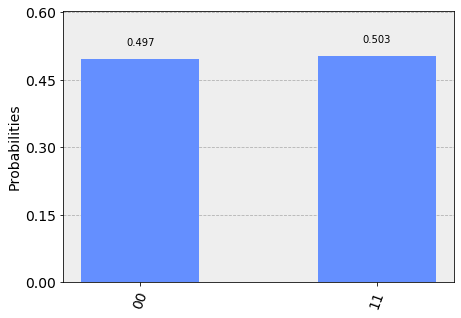

In [5]:
# Use Aer's qasm_simulator
simulator = q.Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = q.execute(circuit, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

q.visualization.plot_histogram(counts)